In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [ ]:
test.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [ ]:
print(train.shape, test.shape)

(243787, 21) (104480, 20)


In [ ]:
print(train.columns, test.columns)

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object') Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID'],
      dtype='object')


In [ ]:
train.isnull().sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [ ]:
test.isnull().sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [ ]:
train['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
No,121980
Yes,121807


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='SubscriptionType', ylabel='count'>

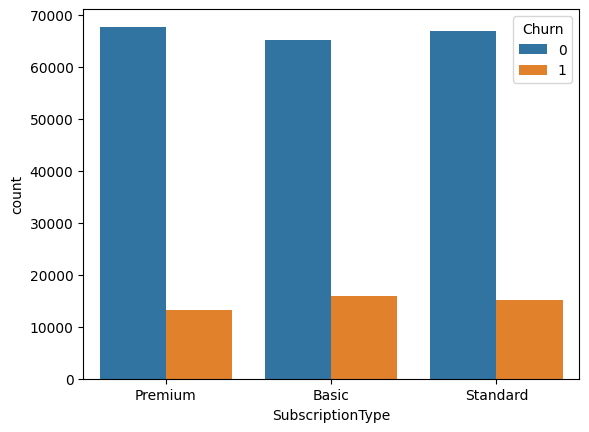

In [ ]:
sns.countplot(x='SubscriptionType',hue='Churn',data=train)

In [ ]:
train['MultiDeviceAccess'].value_counts()

,count
MultiDeviceAccess,
No,122035
Yes,121752


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='MultiDeviceAccess', ylabel='count'>

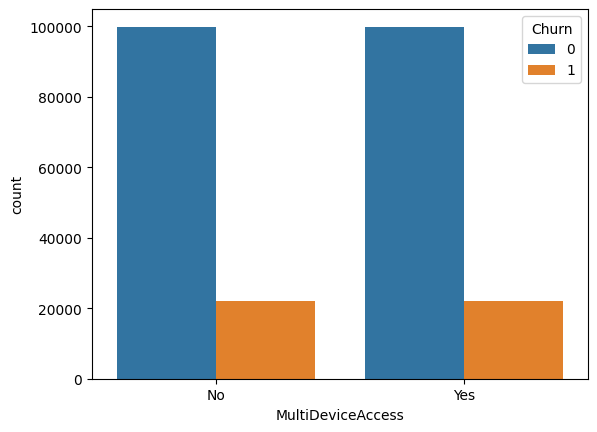

In [ ]:
sns.countplot(x='MultiDeviceAccess',hue='Churn',data=train)

In [ ]:
train['Gender'].value_counts()

,count
Gender,
Female,121930
Male,121857


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Gender', ylabel='count'>

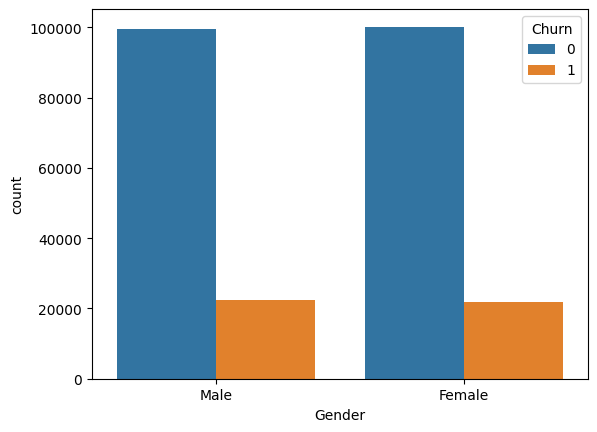

In [ ]:
sns.countplot(x='Gender',hue='Churn',data=train)

In [ ]:
train['DeviceRegistered'].value_counts()

,count
DeviceRegistered,
Computer,61147
Tablet,61143
Mobile,60914
TV,60583


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='DeviceRegistered', ylabel='count'>

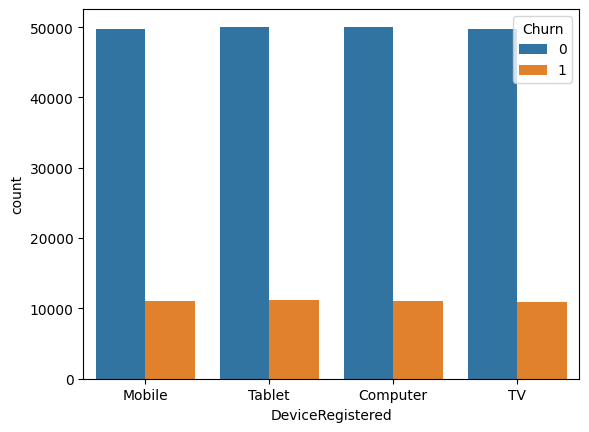

In [ ]:
sns.countplot(x='DeviceRegistered',hue='Churn',data=train)

In [ ]:
for col in train.columns:
  print(col, train[col].value_counts())

AccountAge AccountAge
93     2168
95     2157
19     2148
74     2143
99     2141
       ... 
5      1967
20     1957
10     1953
107    1942
108    1931
Name: count, Length: 119, dtype: int64
MonthlyCharges MonthlyCharges
11.593774    1
11.055215    1
5.175208     1
12.106657    1
7.263743     1
            ..
7.589784     1
16.692975    1
14.665402    1
14.666920    1
5.973690     1
Name: count, Length: 243787, dtype: int64
TotalCharges TotalCharges
1043.439704    1
221.104302     1
294.986882     1
883.785952     1
232.439774     1
              ..
743.798786     1
784.569833     1
161.319419     1
733.345994     1
29.868449      1
Name: count, Length: 243787, dtype: int64
SubscriptionType SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64
PaymentMethod PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
PaperlessBilling PaperlessBilling
No     12

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


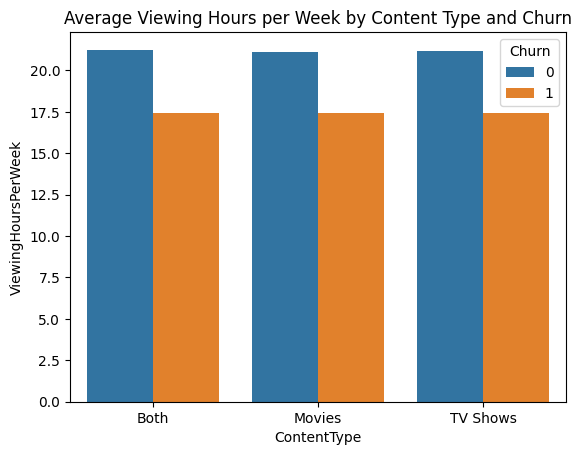

In [ ]:
agg_data = train.groupby(['ContentType', 'Churn'])['ViewingHoursPerWeek'].mean().reset_index()

sns.barplot(x='ContentType', y='ViewingHoursPerWeek', hue='Churn', data=agg_data)
plt.title('Average Viewing Hours per Week by Content Type and Churn')
plt.show()

In [ ]:
# for index, row in train.iterrows():
#     hours = row['ViewingHoursPerWeek']

#     if hours < 10:
#         train.at[index, 'ActivityLevel'] = 'Less Active User'
#     elif 10 <= hours <= 20:
#         train.at[index, 'ActivityLevel'] = 'Moderately Active User'
#     elif hours > 20:
#         train.at[index, 'ActivityLevel'] = 'Frequently Active User'

In [ ]:
# train['ActivityLevel'].shape

In [ ]:
# train['ActivityLevel'].value_counts()

In [ ]:
# for index, row in train.iterrows():
#     duration = row['AverageViewingDuration']

#     if duration < 50:
#         train.at[index, 'ActivityLevel'] = 'Less Active User'
#     elif 50<= duration <= 85:
#         train.at[index, 'ActivityLevel'] = 'Moderately Active User'
#     elif duration > 85:
#         train.at[index, 'ActivityLevel'] = 'Frequently Active User'

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='GenrePreference', ylabel='count'>

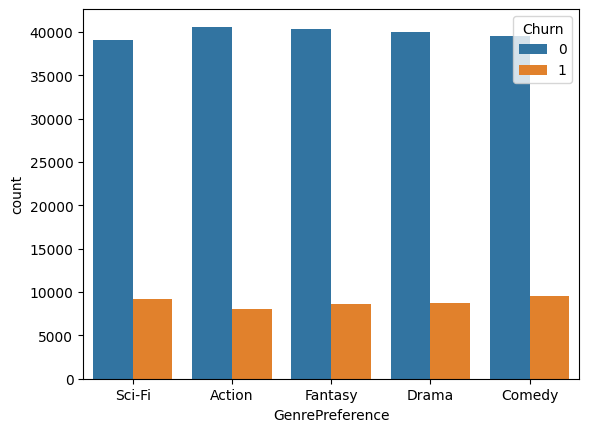

In [ ]:
sns.countplot(x='GenrePreference',hue='Churn',data=train)

In [ ]:
train.drop([ 'WatchlistSize','SubtitlesEnabled','CustomerID', 'GenrePreference', 'SupportTicketsPerMonth',
            'ContentDownloadsPerMonth', 'ContentType', 'PaperlessBilling', 'PaymentMethod'], axis=1, inplace=True)

In [ ]:
train.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,UserRating,Gender,ParentalControl,Churn
0,20,11.055215,221.104302,Premium,No,Mobile,36.758104,63.531377,2.176498,Male,No,0
1,57,5.175208,294.986882,Basic,No,Tablet,32.450568,25.725595,3.478632,Male,No,0
2,73,12.106657,883.785952,Basic,No,Computer,7.395160,57.364061,4.238824,Male,Yes,0
3,32,7.263743,232.439774,Basic,No,Tablet,27.960389,131.537507,4.276013,Male,Yes,0
4,57,16.953078,966.325422,Premium,No,TV,20.083397,45.356653,3.616170,Female,No,0


In [ ]:
train.shape

(243787, 12)

In [ ]:
train['AccountAge'].unique()

array([ 20,  57,  73,  32, 113,  38,  25,  26,  14, 114,   3,  64,  43,
        98,  47,  11,  50,   5,  63,  55,  84,  16,  80, 116,  33,  86,
        52,  77,   4,  91, 119,  72,  94,  99,  40,  60, 105,  54,  34,
        67,  49, 100,   6,  97,  24,  53,  82,  18,   8,  29,   9, 101,
        30,  74,  17,  69,  61,  65,  96,  62,  35,  51, 109,  76,   2,
        42, 111,  68,  15,  27,  58, 103,  45,  36,  85, 107, 115,  81,
       106,  70,  46,  83,  92,   1,  44, 118,  23,  88,   7,  31,  71,
        48,  93, 117,  95,  37, 112,  21, 108,  19,  12,  78, 104,  87,
        90, 110,  56,  79,  41,  13,  28,  10,  59,  39,  75, 102,  89,
        66,  22])

In [ ]:
train['SubscriptionType'].unique()

array(['Premium', 'Basic', 'Standard'], dtype=object)

In [ ]:
subscription_mapping = {
    'Basic': 0,
    'Standard': 1,
    'Premium' : 2
}

train['SubscriptionType'] = train['SubscriptionType'].map(subscription_mapping)

In [ ]:
train['SubscriptionType'].value_counts()

,count
SubscriptionType,
1,81920
0,81050
2,80817


In [ ]:
devices_mapping = {
    'No': 0,
    'Yes' : 1
}

train['MultiDeviceAccess'] = train['MultiDeviceAccess'].map(devices_mapping)

In [ ]:
train['MultiDeviceAccess'].value_counts()

,count
MultiDeviceAccess,
0,122035
1,121752


In [ ]:
train['DeviceRegistered'].unique()

array(['Mobile', 'Tablet', 'Computer', 'TV'], dtype=object)

In [ ]:
registered_devices_mapping = {
    'Mobile': 0,
    'Tablet': 1,
    'Computer' : 2,
    'TV' : 3
}

train['DeviceRegistered'] = train['DeviceRegistered'].map(registered_devices_mapping)

In [ ]:
# train['ActivityLevel'].unique()

In [ ]:
# activity_mapping = {
#     'Less Active User': 0,
#     'Moderately Active User': 1,
#     'Frequently Active User' : 2
# }

# train['ActivityLevel'] = train['ActivityLevel'].map(activity_mapping)

In [ ]:
gender_mapping = {
    'Male': 1,
    'Female': 0
}

train['Gender'] = train['Gender'].map(gender_mapping)

parental_control_mapping = {
    'Yes': 1,
    'No': 0
}

train['ParentalControl'] = train['ParentalControl'].map(parental_control_mapping)

In [ ]:
train.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,UserRating,Gender,ParentalControl,Churn
0,20,11.055215,221.104302,2,0,0,36.758104,63.531377,2.176498,1,0,0
1,57,5.175208,294.986882,0,0,1,32.450568,25.725595,3.478632,1,0,0
2,73,12.106657,883.785952,0,0,2,7.395160,57.364061,4.238824,1,1,0
3,32,7.263743,232.439774,0,0,1,27.960389,131.537507,4.276013,1,1,0
4,57,16.953078,966.325422,2,0,3,20.083397,45.356653,3.616170,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = train.drop('Churn', axis=1)
y = train['Churn']

# scaler = MinMaxScaler()

# X_scaled = scaler.fit_transform(X)

# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# print(X_scaled_df.head())


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# model = RandomForestClassifier(random_state=42)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
# import numpy as np
# user_input = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
#               'MultiDeviceAccess', 'DeviceRegistered', 'UserRating', 'Gender',
#               'ParentalControl', 'ActivityLevel']
# def predict_churn(user_input):
#     input_df = pd.DataFrame([user_input], columns=X.columns)

#     scaled_input = scaler.transform(input_df)

#     prediction = model.predict(scaled_input)
#     return prediction[0]

# churn_prediction = predict_churn(user_input)
# print("Churn Prediction:", churn_prediction)


In [ ]:
X

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,UserRating,Gender,ParentalControl
0,20,11.055215,221.104302,2,0,0,36.758104,63.531377,2.176498,1,0
1,57,5.175208,294.986882,0,0,1,32.450568,25.725595,3.478632,1,0
2,73,12.106657,883.785952,0,0,2,7.395160,57.364061,4.238824,1,1
3,32,7.263743,232.439774,0,0,1,27.960389,131.537507,4.276013,1,1
4,57,16.953078,966.325422,2,0,3,20.083397,45.356653,3.616170,0,0
...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,0,0,2,13.502729,80.367312,3.697451,1,1
243783,117,13.049257,1526.763053,2,1,3,24.963291,59.818441,1.449742,1,0
243784,113,14.514569,1640.146267,2,0,3,10.628728,176.186095,4.012217,1,1
243785,7,18.140555,126.983887,2,0,3,30.466782,153.386315,2.135789,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(243787, 11) (195029, 11) (48758, 11)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train_std, y_train)

RandomForestClassifier()

In [ ]:
X_test_prediction = model.predict(X_test_std)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print(test_data_accuracy)

0.8180606259485623


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_std, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Fit the best model
best_model.fit(X_train_std, y_train)
X_test_prediction = best_model.predict(X_test_std)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Improved test data accuracy:", test_data_accuracy)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train_std = scaler.fit_transform(X_resampled)
# X_test_std = scaler.transform(X_test)

In [ ]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
243782,0
243783,0
243784,0
243785,0


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LeakyReLU
# from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam

# tf.random.set_seed(3)

# model = Sequential([
#     Dense(128, kernel_regularizer='l2', input_shape=(X_train_std.shape[1],)),
#     LeakyReLU(alpha=0.2),
#     Dropout(0.3),
#     Dense(64, kernel_regularizer='l2'),
#     LeakyReLU(alpha=0.2),
#     Dropout(0.3),
#     Dense(32, kernel_regularizer='l2'),
#     LeakyReLU(alpha=0.2),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])


In [ ]:
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights_dict = dict(enumerate(class_weights))

# history = model.fit(X_train_std, y_resampled, validation_split=0.1, epochs=10,
#                     callbacks=[early_stopping], class_weight=class_weights_dict)
# # history = model.fit(X_train_std, y_resampled, validation_split=0.1, epochs=10, callbacks=[early_stopping])

In [ ]:
# import tensorflow as tf
# tf.random.set_seed(3)
# from tensorflow import keras

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
# from keras.regularizers import l2
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(11,), kernel_regularizer=l2(0.01)),
#     Dropout(0.5),
#     Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

In [ ]:
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# history = model.fit(X_train_std, y_train.values.ravel(), validation_split=0.1, epochs=10, callbacks=[early_stopping])

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# model = AdaBoostClassifier(n_estimators=50, random_state=2)
# model.fit(X_train_std, y_train)

# y_pred = model.predict(X_test_std)

# r2 = r2_score(y_test, y_pred)
# print("R-squared:", r2)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# model = GradientBoostingClassifier(n_estimators=50, random_state=2)

# model.fit(X_train_std, y_train)

# y_pred = model.predict(X_test_std)

# r2 = r2_score(y_test, y_pred)
# print("R-squared:", r2)


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import mean_squared_error, r2_score
# model = DecisionTreeClassifier()
# model.fit(X_train_std, y_train)

# y_pred = model.predict(X_test_std)

# mse = mean_squared_error(y_test, y_pred)

# print("Mean squared error:", mse)
# r2 = r2_score(y_test, y_pred)

# print("R2 Score:", r2)

In [ ]:
# import xgboost as xgb

# model_xgb = xgb.XGBClassifier(n_estimators=50, random_state=2)

# model_xgb.fit(X_train_std, y_train)

# y_pred_xgb = model_xgb.predict(X_test_std)

# r2_xgb = r2_score(y_test, y_pred_xgb)
# print("XGBoost R-squared:", r2_xgb)
